# Explore sampling in air quality data

## Introduction
In this notebook, I will engage in effective sampling of a dataset in order to make it easier to analyze. In this activity, I'm working with data from the United States Environmental Protection Agency (EPA). The data utilized in this activity includes information from over 200 sites, identified by their state name, county name, city name, and local site name.

## Step 1: Imports

In [1]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
# Import data
epa_data = pd.read_csv("c4_epa_air_quality.csv", index_col = 0)

## Step 2: Data exploration

To understand how the dataset is structured, let's examine the first 10 rows of the data.

In [3]:
# First 10 rows of the data
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


**Question:** What does the `aqi` column represent?

The air quality index

Now let's Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [4]:
epa_data.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

is 6.8

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

there are 260 elements. 

Now, I'll use the `mean()` function on the `aqi`  column and assign the value to a variable call `population_mean`.

In [5]:
population_mean = epa_data['aqi'].mean()
population_mean

6.757692307692308

## Step 3: Statistical tests

First, I'll create a new variable call `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`.

In [24]:
sampled_data = epa_data.sample(n=50, replace='True', random_state=32)

Now, it's moment to check the sample out. 

In [25]:
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
215,2018-01-01,Ohio,Cuyahoga,Warrensville Heights,Cleveland Near Road,Carbon monoxide,Parts per million,0.321053,5
43,2018-01-01,California,Contra Costa,Concord,Concord,Carbon monoxide,Parts per million,0.294444,5
88,2018-01-01,New Jersey,Union,Elizabeth,Elizabeth Lab,Carbon monoxide,Parts per million,0.500000,6
252,2018-01-01,Ohio,Hamilton,Cincinnati,Cincinnati Near Road,Carbon monoxide,Parts per million,0.226316,3
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
89,2018-01-01,Maryland,Howard,North Laurel,Howard County Near Road,Carbon monoxide,Parts per million,0.215789,3
259,2018-01-01,North Carolina,Wake,Not in a city,Triple Oak,Carbon monoxide,Parts per million,0.188889,2
234,2018-01-01,New York,Albany,Albany,LOUDONVILLE,Carbon monoxide,Parts per million,0.221053,3
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


Now it's moment to compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [26]:
sample_mean = sampled_data['aqi'].mean()
sample_mean

5.44

For the next step, I will check the central limit theorem. In order to do that, I will make several samples. 

*Central limit theorem: is a fundamental concept in statistics that states that the sampling distribution of the sample mean of a random variable approaches a normal distribution as the sample size increases, regardless of the shape of the original population distribution, provided that the sample size is sufficiently large.*

In [27]:
estimate_list = []
for i in range(10000):
    sample_mean = epa_data['aqi'].sample(n=50, replace='True').mean()
    estimate_list.append(sample_mean)

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [28]:
estimate_df = pd.DataFrame(data={'mean':estimate_list})

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [29]:
mean_sample_means = estimate_df.mean()
mean_sample_means

mean    6.762514
dtype: float64

In [30]:
mean_sample_means = float(mean_sample_means)
mean_sample_means

C:\Users\silvi\AppData\Local\Temp\ipykernel_3508\2811474802.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_sample_means = float(mean_sample_means)


6.762514

Now in order to convey in a better way the results. I will output the distribution of these estimates using a histogram.

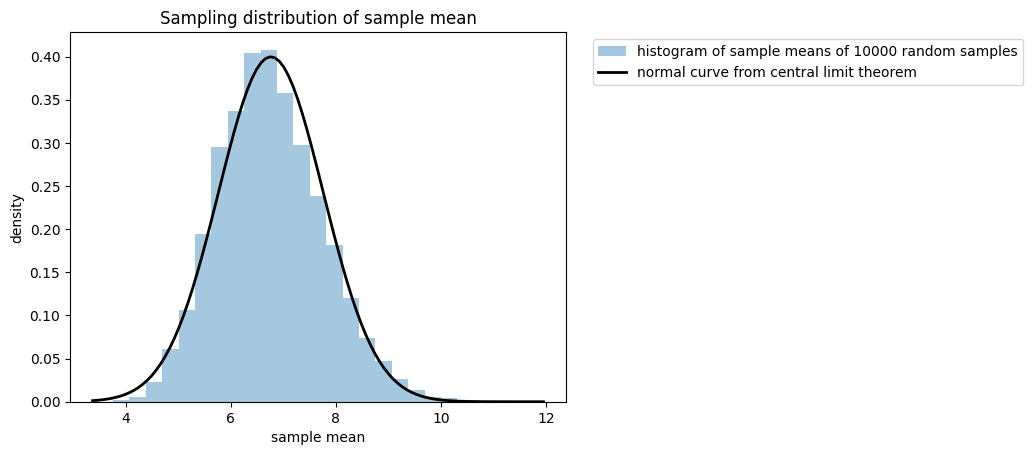

In [31]:
plt.hist(estimate_df['mean'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['mean']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

I will calculate the standard error of the mean AQI using the initial sample of 50.

In [34]:
standard_deviation = np.std(sampled_data['aqi'])
sample_size = len(sampled_data)
standard_error = standard_deviation / np.sqrt(sample_size)
standard_error

0.6087101116295014

## Step 4: Results and evaluation

Let's visualize the relationship between this sampling distribution of 10,000 estimates and the normal distribution.

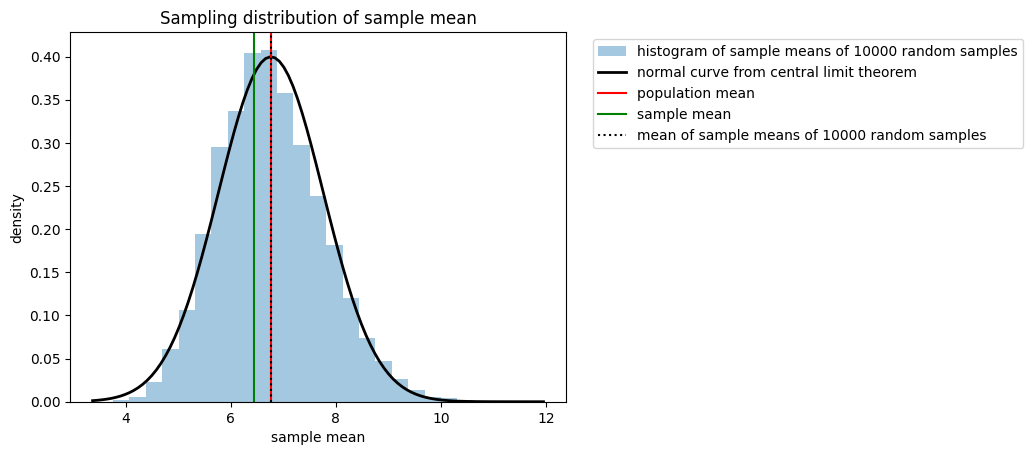

In [35]:
plt.hist(estimate_df['mean'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['mean']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='r', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='g', linestyle = 'solid', label = 'sample mean')
plt.axvline(x=mean_sample_means, color='black', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()